In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [ ]:
data = pd.read_csv('../Data/210721_cyt/2021-04-09.csv')

In [ ]:
data.head()

,uuid,time,measurement,site_id,mote_id,sensor_id,sensor_status,sensor_value
0,49bc8f20-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,battery,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1072
1,49bc9a24-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,soc_temp,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_INTERNAL_TEMP,FFC_SENSOR_OK,23.7800
2,49bca1e0-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,soil_moisture,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_EC5,FFC_SENSOR_UNPLUGGED,0.0128
3,49bca960-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,air_temp,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_SHT3x0,FFC_SENSOR_OK,19.0460
4,49bcb3f6-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,air_hum,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_SHT3x0,FFC_SENSOR_OK,51.3770


In [ ]:
data.measurement.unique()

array(['battery', 'soc_temp', 'soil_moisture', 'air_temp', 'air_hum'],
      dtype=object)

In [ ]:
data.mote_id.unique()

array(['00-17-0d-00-00-59-cd-bf', '00-17-0d-00-00-59-d1-da',
       '00-17-0d-00-00-59-cd-c7', '00-17-0d-00-00-59-d2-1a',
       '00-17-0d-00-00-59-cd-b3', '00-17-0d-00-00-59-cd-d7',
       '00-17-0d-00-00-59-ce-d8'], dtype=object)

In [ ]:
data.sensor_id.unique()

array(['FFC_SENSOR_BAT', 'FFC_SENSOR_INTERNAL_TEMP', 'FFC_SENSOR_EC5',
       'FFC_SENSOR_SHT3x0', 'FFC_SENSOR_SHT3x1', 'FFC_SENSOR_SHT3x2',
       'FFC_SENSOR_SHT3x3'], dtype=object)

In [ ]:
df = pd.DataFrame()

In [ ]:
data_temp_hum = data[data.measurement == 'air_temp'].append(data[data.measurement == 'air_hum'])
data_temp_hum_ok = data_temp_hum[data_temp_hum.sensor_status == 'FFC_SENSOR_OK']

In [ ]:
data_temp_hum_ok.head()

,uuid,time,measurement,site_id,mote_id,sensor_id,sensor_status,sensor_value
3,49bca960-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,air_temp,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_SHT3x0,FFC_SENSOR_OK,19.046
7,49bcca62-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,air_temp,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_SHT3x2,FFC_SENSOR_OK,18.654
9,49bcd930-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:45.394494,air_temp,CyT_Triangulo,00-17-0d-00-00-59-cd-bf,FFC_SENSOR_SHT3x3,FFC_SENSOR_OK,18.446
14,4e4922a6-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:53.026215,air_temp,CyT_Triangulo,00-17-0d-00-00-59-d1-da,FFC_SENSOR_SHT3x0,FFC_SENSOR_OK,18.726
16,4e492ddc-9941-11eb-8b22-b827eb409662,2021-04-09T10:38:53.026215,air_temp,CyT_Triangulo,00-17-0d-00-00-59-d1-da,FFC_SENSOR_SHT3x1,FFC_SENSOR_OK,18.269


In [ ]:
data_group = data_temp_hum_ok.groupby(['time', 'mote_id', 'measurement'])['sensor_value'].agg(['mean', 'std', 'min'])

In [ ]:
data_group.head()

mean  \
time                       mote_id                 measurement              
2021-04-09T10:38:45.394494 00-17-0d-00-00-59-cd-bf air_hum      53.656667   
                                                   air_temp     18.715333   
2021-04-09T10:38:53.026215 00-17-0d-00-00-59-d1-da air_hum      55.587000   
                                                   air_temp     18.222500   
2021-04-09T10:38:57.573617 00-17-0d-00-00-59-cd-c7 air_hum      53.644750   

                                                                     std  \
time                       mote_id                 measurement             
2021-04-09T10:38:45.394494 00-17-0d-00-00-59-cd-bf air_hum      2.128866   
                                                   air_temp     0.304666   
2021-04-09T10:38:53.026215 00-17-0d-00-00-59-d1-da air_hum      0.900976   
                                                   air_temp     0.394308   
2021-04-09T10:38:57.573617 00-17-0d-00-00-59-cd-c7 air_hum      1.529583   

                                                                   min  
time                       mote_id                 measurement          
2021-04-09T10:38:45.394494 00-17-0d-00-00-59-cd-bf air_hum      51.377  
                                                   air_temp     18.446  
2021-04-09T10:38:53.026215 00-17-0d-00-00-59-d1-da air_hum      54.470  
                                                   air_temp     17.775  
2021-04-09T10:38:57.573617 00-17-0d-00-00-59-cd-c7 air_hum      51.820

In [ ]:
df_data_group = pd.DataFrame(data_group.unstack(level='measurement')).reset_index()
df_data_group.head()

time                  mote_id       mean  \
measurement                                                         air_hum   
0            2021-04-09T10:38:45.394494  00-17-0d-00-00-59-cd-bf  53.656667   
1            2021-04-09T10:38:53.026215  00-17-0d-00-00-59-d1-da  55.587000   
2            2021-04-09T10:38:57.573617  00-17-0d-00-00-59-cd-c7  53.644750   
3            2021-04-09T10:38:57.645502  00-17-0d-00-00-59-d2-1a  54.417000   
4            2021-04-09T10:38:57.721746  00-17-0d-00-00-59-cd-b3  55.039750   

                             std               min           
measurement   air_temp   air_hum  air_temp air_hum air_temp  
0            18.715333  2.128866  0.304666  51.377   18.446  
1            18.222500  0.900976  0.394308  54.470   17.775  
2            18.685000  1.529583  0.526371  51.820   18.133  
3            18.367333  0.430150  0.365711  53.950   18.080  
4            18.430250  0.607792  0.335926  54.293   18.050

In [ ]:
df_data_group['time'] = pd.to_datetime(df_data_group['time'])

In [ ]:
data = pd.read_csv('../Data/210721_cyt/2021-04-09.csv')
data_temp_hum = data[data.measurement == 'air_temp'].append(data[data.measurement == 'air_hum'])
data_temp_hum_ok = data_temp_hum[data_temp_hum.sensor_status == 'FFC_SENSOR_OK']
data_group = data_temp_hum_ok.groupby(['time', 'mote_id', 'measurement'])['sensor_value'].agg(['mean', 'std', 'min'])
df_data_group = pd.DataFrame(data_group.unstack(level='measurement')).reset_index()
df_data_group['time'] = pd.to_datetime(df_data_group['time'])
df_zip = zip(df_data_group['time'], df_data_group['mote_id'], 
                df_data_group['mean'].air_hum, df_data_group['mean'].air_temp,
                df_data_group['std'].air_hum, df_data_group['std'].air_temp,
                df_data_group['min'].air_hum, df_data_group['min'].air_temp)
df_final = pd.DataFrame(df_zip)
df = df.append(df_final)
df.columns = ['time', 'mote_id', 'mean_hum', 'mean_temp', 'std_hum', 'std_temp', 'min_hum', 'min_temp']
df.head()

,time,mote_id,mean_hum,mean_temp,std_hum,std_temp,min_hum,min_temp
0,2021-04-09 10:38:45.394494,00-17-0d-00-00-59-cd-bf,53.656667,18.715333,2.128866,0.304666,51.377,18.446
1,2021-04-09 10:38:53.026215,00-17-0d-00-00-59-d1-da,55.587000,18.222500,0.900976,0.394308,54.470,17.775
2,2021-04-09 10:38:57.573617,00-17-0d-00-00-59-cd-c7,53.644750,18.685000,1.529583,0.526371,51.820,18.133
3,2021-04-09 10:38:57.645502,00-17-0d-00-00-59-d2-1a,54.417000,18.367333,0.430150,0.365711,53.950,18.080
4,2021-04-09 10:38:57.721746,00-17-0d-00-00-59-cd-b3,55.039750,18.430250,0.607792,0.335926,54.293,18.050


In [ ]:
df = df.set_index('time')

In [ ]:
df = df.resample('10T').min()

In [ ]:
df.head()

,mote_id,mean_hum,mean_temp,std_hum,std_temp,min_hum,min_temp
time,,,,,,,
2021-04-09 10:30:00,00-17-0d-00-00-59-cd-b3,52.78650,18.155750,0.268546,0.182696,50.993,17.719
2021-04-09 10:40:00,00-17-0d-00-00-59-cd-b3,49.82100,18.400333,0.130503,0.022627,48.384,18.002
2021-04-09 10:50:00,00-17-0d-00-00-59-cd-b3,47.74025,19.092667,0.190126,0.100456,45.356,18.745
2021-04-09 11:00:00,00-17-0d-00-00-59-cd-b3,46.35750,19.623000,0.081672,0.154586,44.766,19.289
2021-04-09 11:10:00,00-17-0d-00-00-59-cd-b3,44.98450,19.965000,0.094398,0.130936,43.344,19.375


In [ ]:
df = df.reset_index()
df['hm'] = df['time'].apply(lambda n:n.strftime('%H')+':'+n.strftime('%M'))

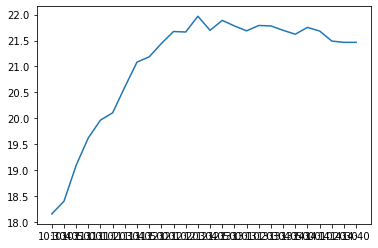

In [ ]:
plt.plot(df.hm, df.mean_temp)
plt.show()

In [39]:
filenames = sorted(glob('../Data/210930_cyt/*.csv'))

In [40]:
df = pd.DataFrame()
for file in filenames:
    data = pd.read_csv(file)
    data_temp_hum = data[data.measurement == 'air_temp'].append(data[data.measurement == 'air_hum'])
    data_temp_hum_ok = data_temp_hum[data_temp_hum.sensor_status == 'FFC_SENSOR_OK']
    data_group = data_temp_hum_ok.groupby(['time', 'mote_id', 'measurement'])['sensor_value'].agg(['mean', 'min'])
    df_data_group = pd.DataFrame(data_group.unstack(level='measurement')).reset_index()
    df_data_group['time'] = pd.to_datetime(df_data_group['time'])
    df_zip = zip(df_data_group['time'], df_data_group['mote_id'], 
                    df_data_group['mean'].air_hum, df_data_group['mean'].air_temp,
                    df_data_group['min'].air_hum, df_data_group['min'].air_temp)
    df_final = pd.DataFrame(df_zip)
    df = df.append(df_final)
    print(file)
    print(len(df))

../Data/210930_cyt/2021-04-09.csv
8640
../Data/210930_cyt/2021-04-12.csv
27089
../Data/210930_cyt/2021-04-16.csv
59194
../Data/210930_cyt/2021-04-17.csv
101850
../Data/210930_cyt/2021-04-18.csv
144524
../Data/210930_cyt/2021-04-19.csv
187736
../Data/210930_cyt/2021-04-20.csv
230678
../Data/210930_cyt/2021-04-21.csv
273379
../Data/210930_cyt/2021-04-22.csv
316256
../Data/210930_cyt/2021-04-23.csv
358956
../Data/210930_cyt/2021-04-24.csv
401684
../Data/210930_cyt/2021-04-25.csv
444124
../Data/210930_cyt/2021-04-26.csv
486573
../Data/210930_cyt/2021-04-27.csv
522004
../Data/210930_cyt/2021-04-28.csv
561369
../Data/210930_cyt/2021-04-29.csv
600741
../Data/210930_cyt/2021-04-30.csv
639900
../Data/210930_cyt/2021-05-01.csv
679293
../Data/210930_cyt/2021-05-02.csv
718589
../Data/210930_cyt/2021-05-03.csv
758048
../Data/210930_cyt/2021-05-04.csv
797552
../Data/210930_cyt/2021-05-05.csv
836921
../Data/210930_cyt/2021-05-06.csv
877682
../Data/210930_cyt/2021-05-07.csv
917215
../Data/210930_cyt/2

In [41]:
df.columns = ['time', 'mote_id', 'mean_hum', 'mean_temp', 'min_hum', 'min_temp']
df.head()

,time,mote_id,mean_hum,mean_temp,min_hum,min_temp
0,2021-04-09 10:38:45.394494,00-17-0d-00-00-59-cd-bf,53.656667,18.715333,51.377,18.446
1,2021-04-09 10:38:53.026215,00-17-0d-00-00-59-d1-da,55.587000,18.222500,54.470,17.775
2,2021-04-09 10:38:57.573617,00-17-0d-00-00-59-cd-c7,53.644750,18.685000,51.820,18.133
3,2021-04-09 10:38:57.645502,00-17-0d-00-00-59-d2-1a,54.417000,18.367333,53.950,18.080
4,2021-04-09 10:38:57.721746,00-17-0d-00-00-59-cd-b3,55.039750,18.430250,54.293,18.050


In [ ]:
#sort by date

In [42]:
#Detectar heladas t<0
df_frost = df[df.min_temp<0]

In [43]:
print(len(df), len(df_frost))

4567201 176117


In [44]:
df_frost.head(10)

,time,mote_id,mean_hum,mean_temp,min_hum,min_temp
4667,2021-05-11 02:00:11.212470,00-17-0d-00-00-59-d1-da,94.66775,0.86125,94.544,-0.019
4776,2021-05-11 02:02:53.328835,00-17-0d-00-00-59-d1-da,94.76075,0.88250,94.718,-0.062
4790,2021-05-11 02:03:12.969754,00-17-0d-00-00-59-d1-da,94.79650,0.96050,94.682,-0.049
4797,2021-05-11 02:03:24.315345,00-17-0d-00-00-59-d1-da,94.82250,0.95375,94.715,-0.062
4803,2021-05-11 02:03:34.129325,00-17-0d-00-00-59-d1-da,94.80050,0.97525,94.624,-0.033
4810,2021-05-11 02:03:42.794082,00-17-0d-00-00-59-d1-da,94.81325,0.94600,94.670,-0.006
4817,2021-05-11 02:03:52.616377,00-17-0d-00-00-59-d1-da,94.79875,0.95975,94.692,-0.006
4823,2021-05-11 02:04:03.137199,00-17-0d-00-00-59-d1-da,94.85575,0.96125,94.714,-0.033
4838,2021-05-11 02:04:33.876880,00-17-0d-00-00-59-d1-da,94.80525,0.93650,94.654,-0.033
4845,2021-05-11 02:04:43.355621,00-17-0d-00-00-59-d1-da,94.85300,0.93600,94.702,-0.105


In [45]:
df_frost = df_frost.reset_index()

In [46]:
df_frost['time'] = pd.to_datetime(df_frost['time'])

In [47]:
print(df.mote_id.unique(), df_frost.mote_id.unique())

['00-17-0d-00-00-59-cd-bf' '00-17-0d-00-00-59-d1-da'
 '00-17-0d-00-00-59-cd-c7' '00-17-0d-00-00-59-d2-1a'
 '00-17-0d-00-00-59-cd-b3' '00-17-0d-00-00-59-cd-d7'
 '00-17-0d-00-00-59-ce-d8' '00-17-0d-00-00-59-d1-d6'
 '00--17-0d-00-00-59-cd-d7' '00-17-0d-000-59-cd-c7'] ['00-17-0d-00-00-59-d1-da' '00-17-0d-00-00-59-cd-c7'
 '00-17-0d-00-00-59-cd-b3' '00-17-0d-00-00-59-cd-d7'
 '00-17-0d-00-00-59-d1-d6' '00-17-0d-00-00-59-cd-bf'
 '00-17-0d-00-00-59-d2-1a' '00-17-0d-00-00-59-ce-d8']


In [48]:
df_frost.time[0].strftime('%H')+':'+df_frost.time[0].strftime('%M')+':'+df_frost.time[0].strftime('%S')

'02:00:11'

In [49]:
df_frost.time[0].strftime('%D')

'05/11/21'

In [50]:
df_frost['hour'] = df_frost['time'].apply(lambda n:n.strftime('%H')+':'+n.strftime('%M')+':'+n.strftime('%S'))
df_frost['date'] = df_frost.time.apply(lambda n: n.strftime('%D'))

In [51]:
df_frost.date.unique()

array(['05/11/21', '05/12/21', '05/16/21', '05/17/21', '05/22/21',
       '05/24/21', '05/26/21', '05/27/21', '06/08/21', '06/26/21',
       '06/27/21', '06/28/21', '06/29/21', '07/01/21', '07/02/21',
       '07/03/21', '07/04/21', '07/05/21', '07/07/21', '07/08/21',
       '07/09/21', '07/10/21', '07/11/21', '07/13/21', '07/14/21',
       '07/15/21', '07/16/21', '07/18/21', '07/19/21', '07/20/21',
       '07/21/21', '07/27/21', '07/28/21', '07/29/21', '07/30/21',
       '08/10/21', '08/11/21', '08/14/21', '08/26/21', '09/09/21',
       '09/29/21'], dtype=object)

In [ ]:
day_helada = ['07/03/21', '05/16/21', '07/16/21', '07/05/21', '05/17/21',
       '06/27/21', '07/11/21', '07/14/21', '05/26/21', '06/28/21',
       '07/13/21', '06/29/21', '07/20/21', '05/11/21', '07/19/21',
       '05/27/21', '05/22/21', '07/02/21', '07/08/21', '07/18/21',
       '07/09/21', '06/08/21', '07/15/21', '07/04/21', '06/26/21',
       '05/12/21', '07/07/21', '07/01/21', '07/10/21', '07/21/21',
       '05/24/21']

In [ ]:
print(day_helada)

['05/11/21', '05/12/21', '05/16/21', '05/17/21', '05/22/21', '05/24/21', '05/26/21', '05/27/21', '06/08/21', '06/26/21', '06/27/21', '06/28/21', '06/29/21', '07/01/21', '07/02/21', '07/03/21', '07/04/21', '07/05/21', '07/07/21', '07/08/21', '07/09/21', '07/10/21', '07/11/21', '07/13/21', '07/14/21', '07/15/21', '07/16/21', '07/18/21', '07/19/21', '07/20/21', '07/21/21']


In [ ]:
df_frost_byday.head()

,index,time,mote_id,mean_hum,mean_temp,min_hum,min_temp,hour,date
0,0,2021-07-03 02:26:39.762678,00-17-0d-00-00-59-cd-b3,93.474333,0.421000,92.869,-0.068,02:26:39,07/03/21
1,1,2021-07-03 02:26:58.487846,00-17-0d-00-00-59-cd-b3,93.532000,0.454667,92.961,-0.025,02:26:58,07/03/21
2,2,2021-07-03 02:27:08.300190,00-17-0d-00-00-59-cd-b3,93.465000,0.440667,92.933,-0.166,02:27:08,07/03/21
3,3,2021-07-03 02:27:19.295482,00-17-0d-00-00-59-cd-b3,93.547000,0.440667,92.997,-0.025,02:27:19,07/03/21
4,4,2021-07-03 02:27:28.886675,00-17-0d-00-00-59-cd-b3,93.563667,0.390000,93.136,-0.150,02:27:28,07/03/21


In [ ]:
date = '05/11/21'
df_frost_byday = df_frost[df_frost.date == date]
df_frost_byday = df_frost_byday.reset_index()
inicio = df_frost_byday.hour[0]
fin = df_frost_byday.hour[len(df_frost_byday.date)-1]
temperature = np.min(df_frost_byday.min_temp)
f"Fecha: {date}, Inicio: {inicio}; Fin: {fin}; Temp: {temperature}"

'Fecha: 05/11/21, Inicio: 02:00:11; Fin: 07:22:06; Temp: -0.5539999999999999'

In [ ]:
#duracion
#grafico t min diaria total
#grafico t minima diaria ultimo mes 

In [ ]:
# same for agroprime

In [ ]:
filenames = glob('../Data/210721_agro/*.csv')
df = pd.DataFrame()

for file in filenames:
    data = pd.read_csv(file)
    data_temp_hum = data[data.measurement == 'air_temp'].append(data[data.measurement == 'air_hum'])
    data_temp_hum_ok = data_temp_hum[data_temp_hum.sensor_status == 'FFC_SENSOR_OK']
    data_group = data_temp_hum_ok.groupby(['time', 'mote_id', 'measurement'])['sensor_value'].agg(['mean', 'min'])
    df_data_group = pd.DataFrame(data_group.unstack(level='measurement')).reset_index()
    df_data_group['time'] = pd.to_datetime(df_data_group['time'])
    df_zip = zip(df_data_group['time'], df_data_group['mote_id'], 
                    df_data_group['mean'].air_hum, df_data_group['mean'].air_temp,
                    df_data_group['min'].air_hum, df_data_group['min'].air_temp)
    df_final = pd.DataFrame(df_zip)
    df = df.append(df_final)
    print(file)
    print(len(df))

../Data/210721_agro/2021-05-20.csv
16728
../Data/210721_agro/2021-03-05.csv
85390
../Data/210721_agro/2020-11-10.csv
119716
../Data/210721_agro/2021-07-03.csv
142361
../Data/210721_agro/2020-10-08.csv
177186
../Data/210721_agro/2020-11-24.csv
190811
../Data/210721_agro/2020-12-24.csv
259456
../Data/210721_agro/2020-12-04.csv
328097
../Data/210721_agro/2021-05-15.csv
368208
../Data/210721_agro/2020-12-09.csv
436843
../Data/210721_agro/2021-02-09.csv
504785
../Data/210721_agro/2021-05-16.csv
552735
../Data/210721_agro/2020-10-30.csv
595492
../Data/210721_agro/2020-11-03.csv
632134
../Data/210721_agro/2021-01-22.csv
697559
../Data/210721_agro/2021-01-31.csv
755632
../Data/210721_agro/2020-10-03.csv
791664
../Data/210721_agro/2020-12-16.csv
860263
../Data/210721_agro/2021-02-28.csv
920351
../Data/210721_agro/2021-03-04.csv
988426
../Data/210721_agro/2020-12-02.csv
1056111
../Data/210721_agro/2021-01-19.csv
1124572
../Data/210721_agro/2021-03-03.csv
1187812
../Data/210721_agro/2021-07-16.cs

In [ ]:
df.columns = ['time', 'mote_id', 'mean_hum', 'mean_temp', 'min_hum', 'min_temp']
df.head()

,time,mote_id,mean_hum,mean_temp,min_hum,min_temp
0,2021-05-20 00:00:00.121042,00-17-0d-00-00-59-a9-fb,98.847333,11.686333,98.097,11.618
1,2021-05-20 00:00:01.763578,00-17-0d-00-00-59-cd-db,98.889000,11.680250,98.559,11.567
2,2021-05-20 00:00:02.779156,00-17-0d-00-00-59-ce-df,98.923750,11.685000,97.895,11.588
3,2021-05-20 00:00:04.265501,00-17-0d-00-00-59-a4-f4,98.252500,11.665750,97.695,11.588
4,2021-05-20 00:00:09.984328,00-17-0d-00-00-59-a9-fb,98.839333,11.654000,98.083,11.548


In [ ]:
#Detectar heladas t<0
df_frost = df[df.min_temp<0]

In [ ]:
df_frost.head()

,time,mote_id,mean_hum,mean_temp,min_hum,min_temp
7459,2021-07-03 05:32:20.499468,00-17-0d-00-00-59-ce-df,94.040500,1.266500,91.679,-0.006
7469,2021-07-03 05:32:50.655261,00-17-0d-00-00-59-ce-df,94.077250,1.227750,91.775,-0.049
7474,2021-07-03 05:33:05.834302,00-17-0d-00-00-59-ce-df,94.063000,1.224250,91.877,-0.019
7479,2021-07-03 05:33:20.733841,00-17-0d-00-00-59-ce-df,94.063750,1.217500,91.793,-0.049
7480,2021-07-03 05:33:22.859935,00-17-0d-00-00-59-d1-e6,94.139333,1.193333,93.461,-0.017


In [ ]:
df_frost = df_frost.reset_index()

In [ ]:
df_frost['time'] = pd.to_datetime(df_frost['time'])

In [ ]:
df_frost['hour'] = df_frost['time'].apply(lambda n:n.strftime('%H')+':'+n.strftime('%M')+':'+n.strftime('%S'))
df_frost['date'] = df_frost.time.apply(lambda n: n.strftime('%D'))

In [ ]:
df_frost.date.unique()

array(['07/03/21', '05/16/21', '10/03/20', '07/16/21', '05/10/21',
       '10/04/20', '06/27/21', '07/11/21', '07/14/21', '05/30/21',
       '05/26/21', '04/25/21', '06/28/21', '10/02/20', '06/07/21',
       '06/10/21', '06/29/21', '06/18/21', '07/20/21', '05/11/21',
       '07/19/21', '10/18/20', '04/29/21', '05/22/21', '07/18/21',
       '09/20/20', '06/17/21', '10/05/20', '07/15/21', '07/17/21',
       '07/04/21', '06/26/21', '05/13/21', '05/12/21', '07/07/21',
       '07/01/21', '07/10/21', '06/25/21', '06/30/21', '06/20/21',
       '07/12/21', '05/24/21'], dtype=object)

In [ ]:
day_helada = ['07/03/21', '05/16/21', '10/03/20', '07/16/21', '05/10/21',
       '10/04/20', '06/27/21', '07/11/21', '07/14/21', '05/30/21',
       '05/26/21', '04/25/21', '06/28/21', '10/02/20', '06/07/21',
       '06/10/21', '06/29/21', '06/18/21', '07/20/21', '05/11/21',
       '07/19/21', '10/18/20', '04/29/21', '05/22/21', '07/18/21',
       '09/20/20', '06/17/21', '10/05/20', '07/15/21', '07/17/21',
       '07/04/21', '06/26/21', '05/13/21', '05/12/21', '07/07/21',
       '07/01/21', '07/10/21', '06/25/21', '06/30/21', '06/20/21',
       '07/12/21', '05/24/21']

In [ ]:
print(day_helada)

['07/03/21', '05/16/21', '10/03/20', '07/16/21', '05/10/21', '10/04/20', '06/27/21', '07/11/21', '07/14/21', '05/30/21', '05/26/21', '04/25/21', '06/28/21', '10/02/20', '06/07/21', '06/10/21', '06/29/21', '06/18/21', '07/20/21', '05/11/21', '07/19/21', '10/18/20', '04/29/21', '05/22/21', '07/18/21', '09/20/20', '06/17/21', '10/05/20', '07/15/21', '07/17/21', '07/04/21', '06/26/21', '05/13/21', '05/12/21', '07/07/21', '07/01/21', '07/10/21', '06/25/21', '06/30/21', '06/20/21', '07/12/21', '05/24/21']


In [ ]:
date = '04/25/21'
df_frost_byday = df_frost[df_frost.date == date]
df_frost_byday = df_frost_byday.reset_index()
inicio = df_frost_byday.hour[0]
fin = df_frost_byday.hour[len(df_frost_byday.date)-1]
temperature = np.min(df_frost_byday.min_temp)
f"Fecha: {date}, Inicio: {inicio}; Fin: {fin}; Temp: {temperature}"

'Fecha: 04/25/21, Inicio: 10:31:39; Fin: 11:05:23; Temp: -0.3'